1. Определить два вектора, представляющие собой число автомобилей,
припаркованных в течении 5 рабочих дней у бизнес-центра на уличной
стоянке и в подземном гараже.
Найти и интерпретировать корреляцию между переменными «Улица» и
«Гараж» (подсчитать корреляцию по Пирсону).

In [46]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
data_auto = pd.DataFrame({'Улица': [80, 98, 75, 91, 78],
                          'Гараж': [100, 82, 105, 89, 102]})

data_auto.index = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница']
data_auto

,Улица,Гараж
Понедельник,80,100
Вторник,98,82
Среда,75,105
Четверг,91,89
Пятница,78,102


In [4]:
# Поиск корреляционной связи между признаками "Улица" и "Гараж"
np.corrcoef(data_auto['Улица'], data_auto['Гараж'])[0, 1]

-0.9999999999999998

In [5]:
data_auto['Улица'].corr(data_auto['Гараж'])

-0.9999999999999998

Получена сильная отрицательная корреляция.

2. Построить диаграмму рассеяния.

<IPython.core.display.Javascript object>


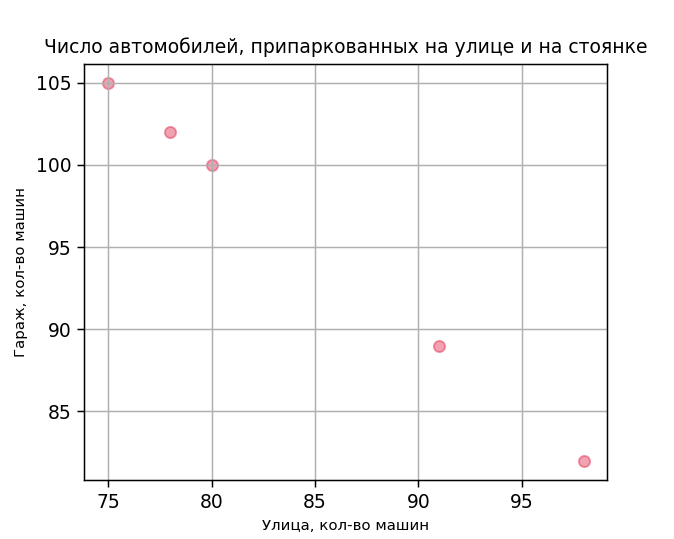

In [167]:
fig = plt.figure('Диаграмма рассеяния', figsize=(5, 4))
plt.grid(True)
plt.title('Число автомобилей, припаркованных на улице и на стоянке', fontsize=10)
plt.xlabel('Улица, кол-во машин', size=8)
plt.ylabel('Гараж, кол-во машин', size=8)
plt.scatter(data_auto['Улица'], data_auto['Гараж'], color='crimson', alpha=0.4)
plt.show()

3. Загрузить bitcoin.csv.

In [7]:
bitcoin = pd.read_csv('bitcoin.csv')
print(bitcoin.shape)
bitcoin.head(3)

(2001, 8)


,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close
0,0,2015-12-20,462.76,431.10,461.20,121531.64,54316484.95,441.78
1,1,2015-12-21,445.54,423.99,441.78,121990.88,53270215.60,437.59
2,2,2015-12-22,443.22,433.25,437.59,65785.54,28845536.39,437.03


In [8]:
bitcoin.drop('Unnamed: 0', axis=1, inplace=True)
bitcoin.head(3)

,time,high,low,open,volumefrom,volumeto,close
0,2015-12-20,462.76,431.10,461.20,121531.64,54316484.95,441.78
1,2015-12-21,445.54,423.99,441.78,121990.88,53270215.60,437.59
2,2015-12-22,443.22,433.25,437.59,65785.54,28845536.39,437.03


In [9]:
bitcoin.describe()

,high,low,open,volumefrom,volumeto,close
count,2001.000000,2001.00000,2001.000000,2001.000000,2.001000e+03,2001.000000
mean,9676.696462,9053.13932,9382.567321,67879.827936,6.200236e+08,9400.737911
std,12789.382358,11880.38559,12372.864718,50970.461471,9.370947e+08,12386.471353
min,375.890000,350.39000,368.020000,9355.130000,7.377922e+06,368.020000
25%,1496.390000,1424.05000,1445.930000,34044.180000,1.052839e+08,1485.550000
50%,6839.600000,6545.41000,6707.460000,52271.640000,3.079266e+08,6708.960000
75%,10123.940000,9577.84000,9846.440000,84630.560000,6.577121e+08,9845.900000
max,64859.810000,62038.33000,63558.480000,495883.240000,1.112022e+10,63558.480000


In [10]:
bitcoin.isna().sum()

time          0
high          0
low           0
open          0
volumefrom    0
volumeto      0
close         0
dtype: int64

In [168]:
bitcoin.duplicated().any()

False

4. Скрыть последние 14 дней.

In [11]:
projection = 14
bitcoin['predict'] = bitcoin['close'].shift(-projection)

In [13]:
bitcoin.sort_values(by='time', ascending=False).head(5)

,time,high,low,open,volumefrom,volumeto,close,predict
2000,2021-06-11,37665.85,35981.84,36680.78,33418.02,1.235391e+09,36843.33,NaN
1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78,NaN
1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58,NaN
1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38,NaN
1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86,NaN


In [14]:
bitcoin.columns.tolist()

['time', 'high', 'low', 'open', 'volumefrom', 'volumeto', 'close', 'predict']

In [15]:
bitcoin.dtypes

time           object
high          float64
low           float64
open          float64
volumefrom    float64
volumeto      float64
close         float64
predict       float64
dtype: object

5. Предсказать стоимость криптовалюты за последние 14 дней с помощью
линейной регрессии.

<IPython.core.display.Javascript object>


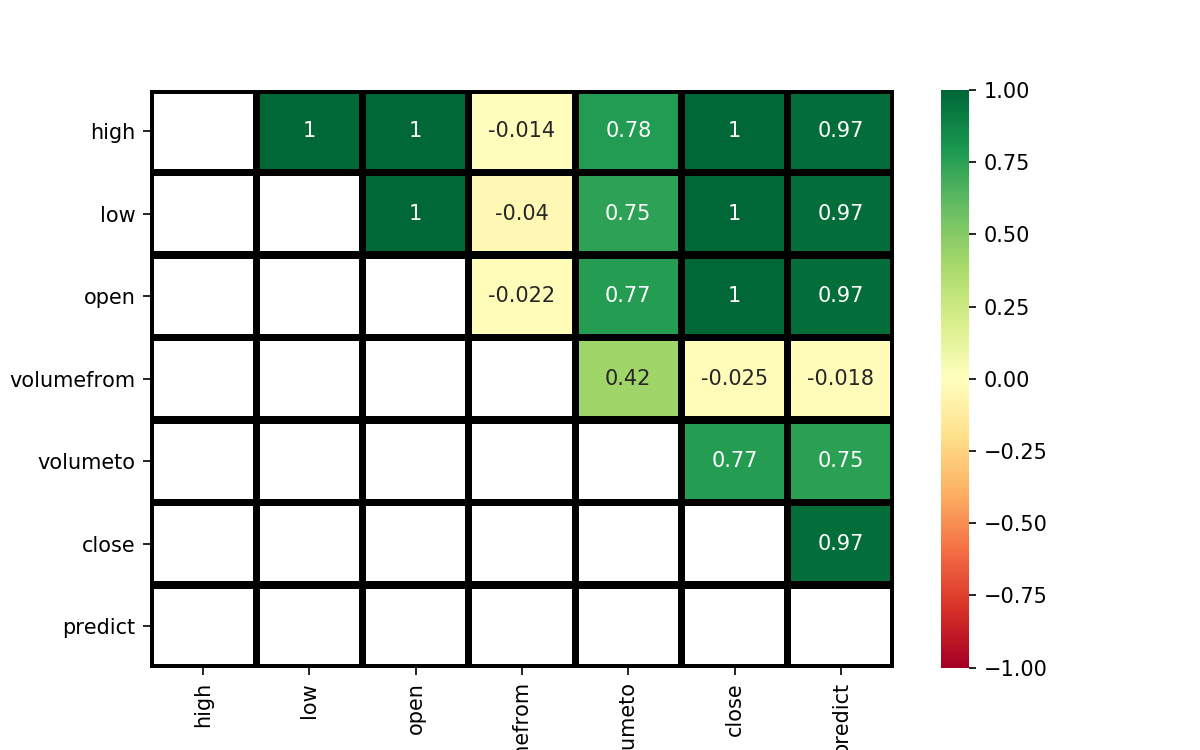

In [17]:
# feature selection
features = bitcoin.loc[:, bitcoin.columns != 'time']
mask = np.tril(features.corr())

fig = plt.figure('Тепловая карта', figsize=(8, 5))
sns.heatmap(features.corr(), annot = True, vmin=-1, vmax=1, center= 0, 
            linewidths=3, linecolor='black', mask=mask, cmap='RdYlGn')

<IPython.core.display.Javascript object>


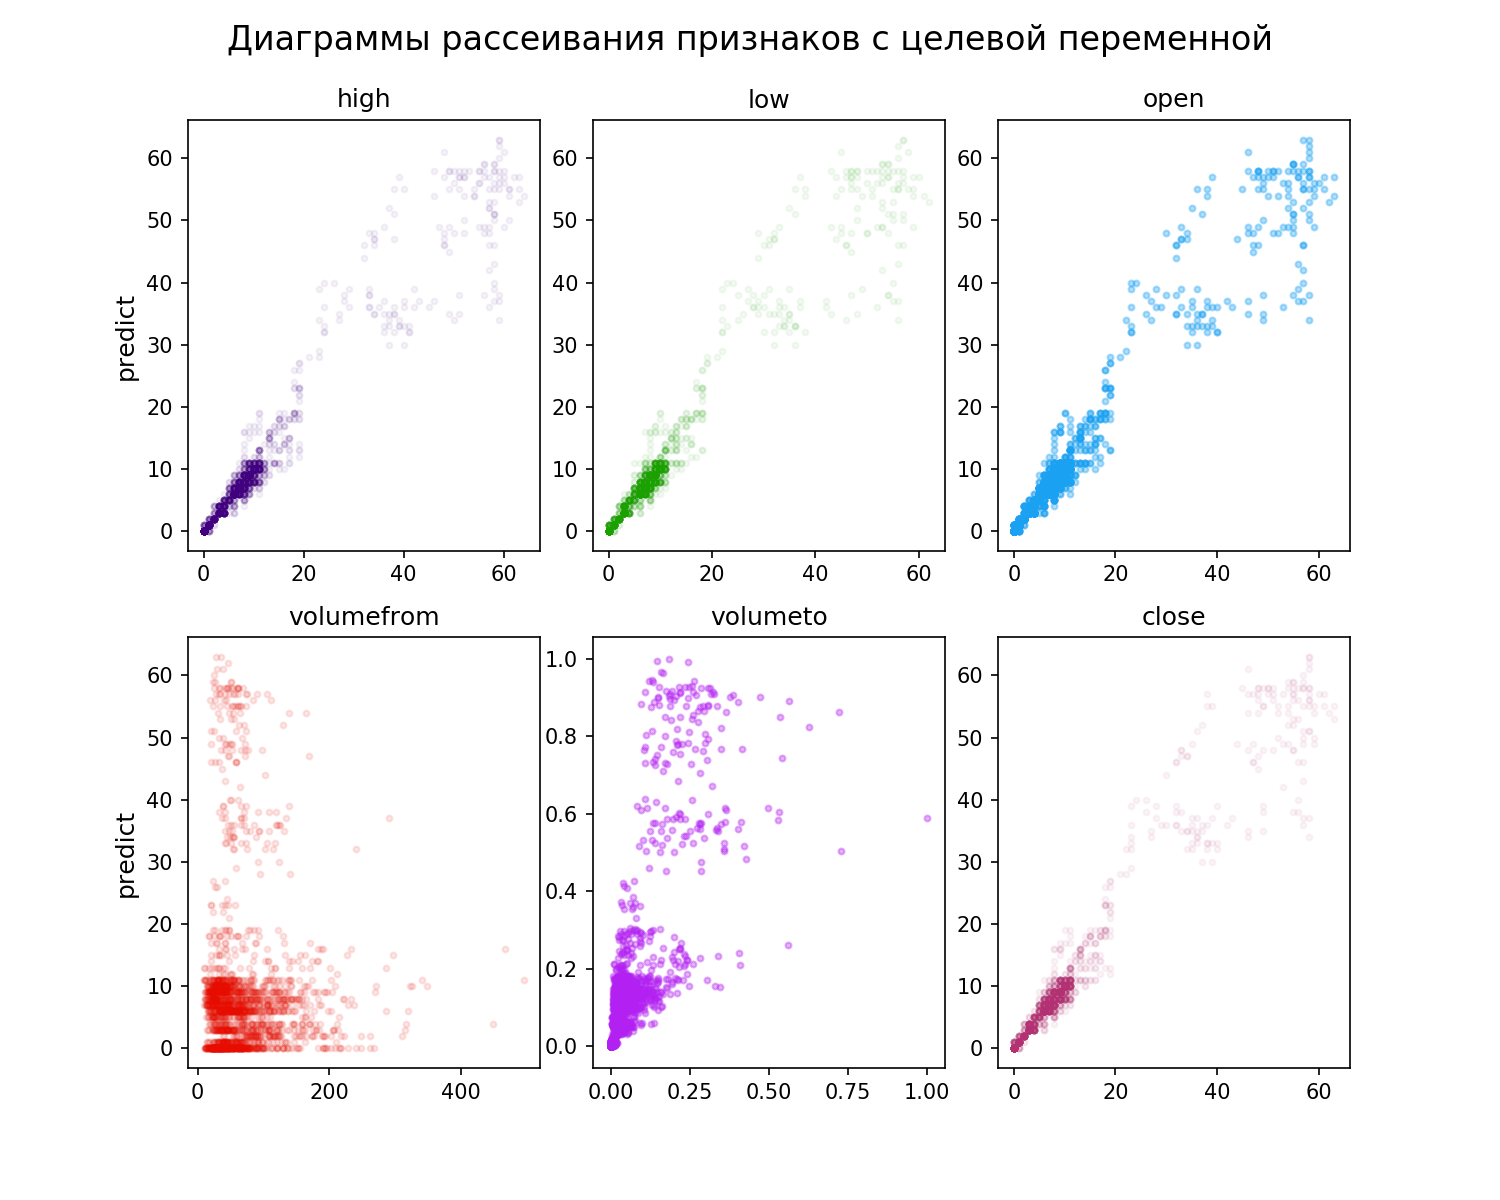

In [36]:
volumeto_normal = MinMaxScaler().fit_transform(features['volumeto'].values.reshape(-1,1))
predict_normal = MinMaxScaler().fit_transform(features['predict'].values.reshape(-1,1))

fig , ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
fig.suptitle('Диаграммы рассеивания признаков с целевой переменной', fontsize=16)

ax[0][0].scatter(features['high'] // 1000, features['predict'] // 1000, c=[[0.25, 0, 0.5, 0.05]], s=8)
ax[0][0].set_title('high', fontsize=12)
ax[0][0].set_ylabel("predict", fontsize=12)

ax[0][1].scatter(features['low'] // 1000, features['predict'] // 1000, c=[[0.1, 0.63, 0, 0.05]], s=8)
ax[0][1].set_title('low', fontsize=12)

ax[0][2].scatter(features['open'] // 1000, features['predict'] // 1000, c=[[0.1, 0.63, 0.95, 0.35]], s=8)
ax[0][2].set_title('open', fontsize=12)

ax[1][0].scatter(features['volumefrom'] // 1000, features['predict'] // 1000, c=[[0.9, 0.05, 0, 0.1]], s=8)
ax[1][0].set_title('volumefrom', fontsize=12)
ax[1][0].set_ylabel("predict", fontsize=12)

ax[1][1].scatter(volumeto_normal, predict_normal, c=[[0.7, 0.13, 0.95, 0.35]], s=8)
ax[1][1].set_title('volumeto', fontsize=12)

ax[1][2].scatter(features['close'] // 1000, features['predict'] // 1000, c=[[0.7, 0.19, 0.45, 0.05]], s=8)
ax[1][2].set_title('close', fontsize=12)

plt.subplots_adjust(top=0.9, wspace=0.15)

In [39]:
model = LinearRegression()
train_X = bitcoin.open[:-14].values.reshape(-1, 1)
train_Y = bitcoin.predict[:-14]
model.fit(bitcoin.open[:-14].values.reshape(-1, 1), bitcoin.predict[:-14])

LinearRegression()

6. Вывести угол наклона и y-перехват.

In [40]:
test_X = bitcoin.open[-14:].values.reshape(-1, 1)
predictions = np.round(model.predict(test_X), 3)
predictions

array([35642.807, 34585.902, 35624.69 , 37233.996, 36633.738, 37516.819,
       39150.28 , 36809.659, 35501.944, 35759.089, 33569.145, 33397.682,
       37333.574, 36631.04 ])

In [42]:
bitcoin['predict'].iloc[-14:] = predictions

In [43]:
true_values = bitcoin.close[-14:].values
true_values

array([34611.58, 35662.59, 37290.83, 36683.51, 37576.98, 39229.66,
       36861.5 , 35538.4 , 35798.57, 33582.86, 33409.38, 37391.58,
       36680.78, 36843.33])

In [44]:
# угол наклона
model.coef_

array([0.9883714])

In [45]:
# сдвиг
model.intercept_

376.80602850320975

In [47]:
mse = ((true_values - predictions)**2).mean()
round(mse, 3)

2660842.814

In [48]:
modelAll = smf.ols('predict ~ open', bitcoin).fit()

In [49]:
modelAll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                predict   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 3.620e+04
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:56:47   Log-Likelihood:                -18773.
No. Observations:                2001   AIC:                         3.755e+04
Df Residuals:                    1999   BIC:                         3.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    376.8060     80.647      4.672      0.000     218.645     534.968
open           0.9884      0.005    190.274      0.000       0.978       0.999
==============================================================================
Omnibus:                      579.988   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26703.608
Skew:                           0.586   Prob(JB):                         0.00
Kurtosis:                      20.858   Cond. No.                     1.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

7. Построить диаграмму.

<IPython.core.display.Javascript object>


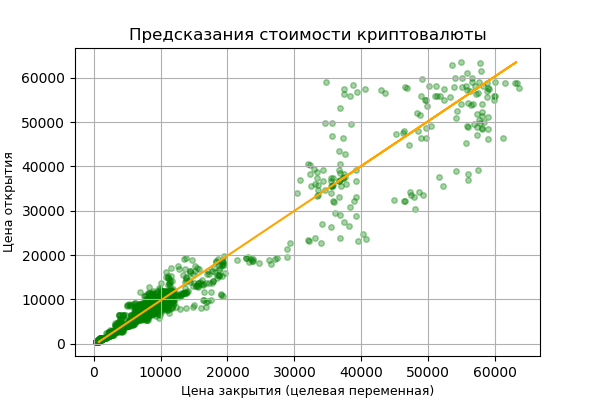

In [169]:
plt.figure(figsize=(6,4))
plt.grid(True)
plt.title('Предсказания стоимости криптовалюты', fontsize=12)
plt.ylabel('Цена открытия', size=9)
plt.xlabel('Цена закрытия (целевая переменная)', size=9)

plt.scatter(bitcoin.predict.values, bitcoin.open.values, alpha=0.35, s=16, c='green')
plt.plot(model.predict(bitcoin.open.values.reshape(-1, 1)), bitcoin.open.values, c='orange')

plt.show()

8. Загрузить housePrice.csv

In [138]:
housePrice = pd.read_csv('housePrice.csv')
print(housePrice.shape)
housePrice.head(3)

(3479, 8)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33


9. Произвести предобработку.

In [109]:
housePrice.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [111]:
housePrice.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [112]:
# housePrice.hist(['Price(USD)'], figsize=(6, 3))
# plt.show()

In [67]:
housePrice.duplicated().any()

True

In [139]:
housePrice = housePrice.drop_duplicates()
housePrice.shape

(3271, 8)

In [140]:
housePrice.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [71]:
housePrice.Address.mode()

0    Punak
dtype: object

In [114]:
# housePrice.Address.value_counts()

In [141]:
housePrice['Address'] = housePrice['Address'].apply(lambda x: housePrice.Address.mode() if pd.isnull(x) else x)

10. Реализовать линейную регрессию вручную, без использования библиотеки.

In [142]:
housePrice["Area"] = pd.to_numeric(housePrice["Area"], errors='coerce')
housePrice["Area"].isna().sum()

6

In [101]:
# housePrice.Area = housePrice.Area.apply(lambda x: int(x) if len(x) < 5 else int(''.join(x.split(' ')[1].split(','))))
# housePrice.Area.unique()

In [143]:
housePrice.isna().sum()

Area          6
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [144]:
housePrice = housePrice.dropna(subset=['Area'])
housePrice.shape

(3265, 8)

In [145]:
answers = housePrice['Price(USD)'].iloc[-14:]
# housePrice['Price(USD)'].iloc[-14:] = None

In [147]:
features = housePrice
corr = features.corr()

corr.style.background_gradient(cmap='coolwarm')

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670137,0.199765,0.073080,0.047987,0.720990,0.720990
Room,0.670137,1.000000,0.279249,0.126244,0.183216,0.569476,0.569476
Parking,0.199765,0.279249,1.000000,0.428073,0.429527,0.192993,0.192993
Warehouse,0.073080,0.126244,0.428073,1.000000,0.204242,0.109675,0.109675
Elevator,0.047987,0.183216,0.429527,0.204242,1.000000,0.110417,0.110417
Price,0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000
Price(USD),0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000


<IPython.core.display.Javascript object>


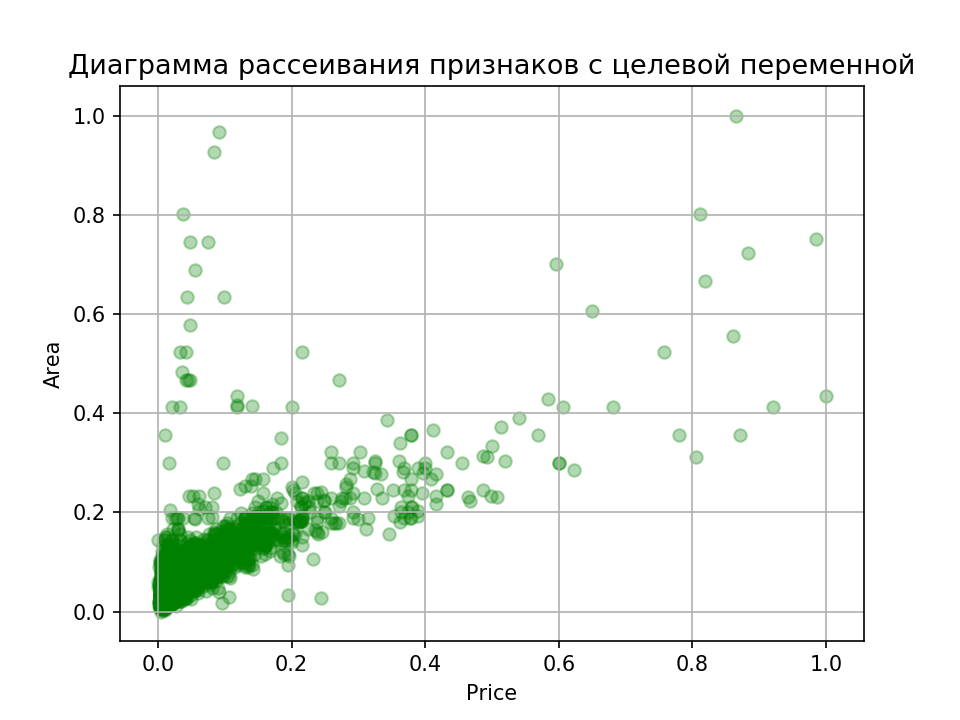

In [153]:
area_normal = MinMaxScaler().fit_transform(features['Area'].iloc[:-14].values.reshape(-1,1))
priceUSD_normal = MinMaxScaler().fit_transform(features['Price(USD)'].iloc[:-14].values.reshape(-1,1))

fig = plt.figure()
plt.grid(True)
plt.scatter(priceUSD_normal, area_normal, color='g', alpha=0.3)
plt.title('Диаграмма рассеивания признаков с целевой переменной', fontsize=13)
plt.xlabel("Price")
plt.ylabel("Area")
fig.show()

In [157]:
X = area_normal
Y = priceUSD_normal
n = np.size(X)

SSxy = np.sum(Y * X) - n * np.mean(Y) * np.mean(X)
SSxx = np.sum(X * X) - n * np.mean(X) * np.mean(X)

B1 = SSxy/SSxx
B0 = np.mean(Y) - B1 * np.mean(X)

11. Вывести угол наклона и y-перехват.

In [158]:
print(f"Коэффициенты: B1 = {B1}, B0 = {B0}")

Коэффициенты: B1 = 0.8181034783971268, B0 = -0.011603967824439967


12. Построить диаграмму.

<IPython.core.display.Javascript object>


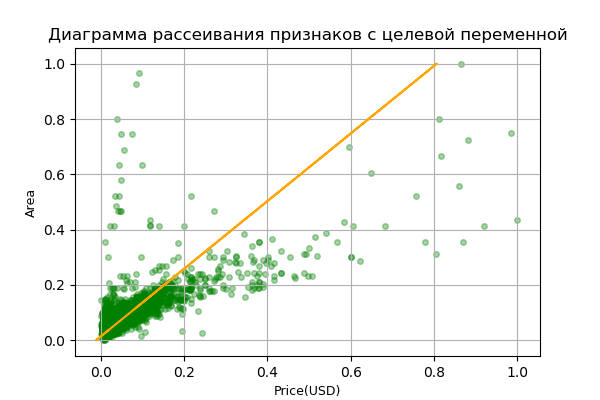

In [170]:
y_pred = B0 + B1 * X

plt.figure(figsize=(6,4))
plt.grid(True)
plt.title('Диаграмма рассеивания признаков с целевой переменной', fontsize=12)
plt.ylabel('Area', size=9)
plt.xlabel('Price(USD)', size=9)

plt.scatter(Y, X, color='g', alpha=0.35, s=16)
plt.plot(y_pred, X, c='orange')

plt.show()